<a href="https://colab.research.google.com/github/eminosman06/oruntuTanimaFiltreleri/blob/main/Filtreler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/skimage/transform/radon_transform.py:74: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn(


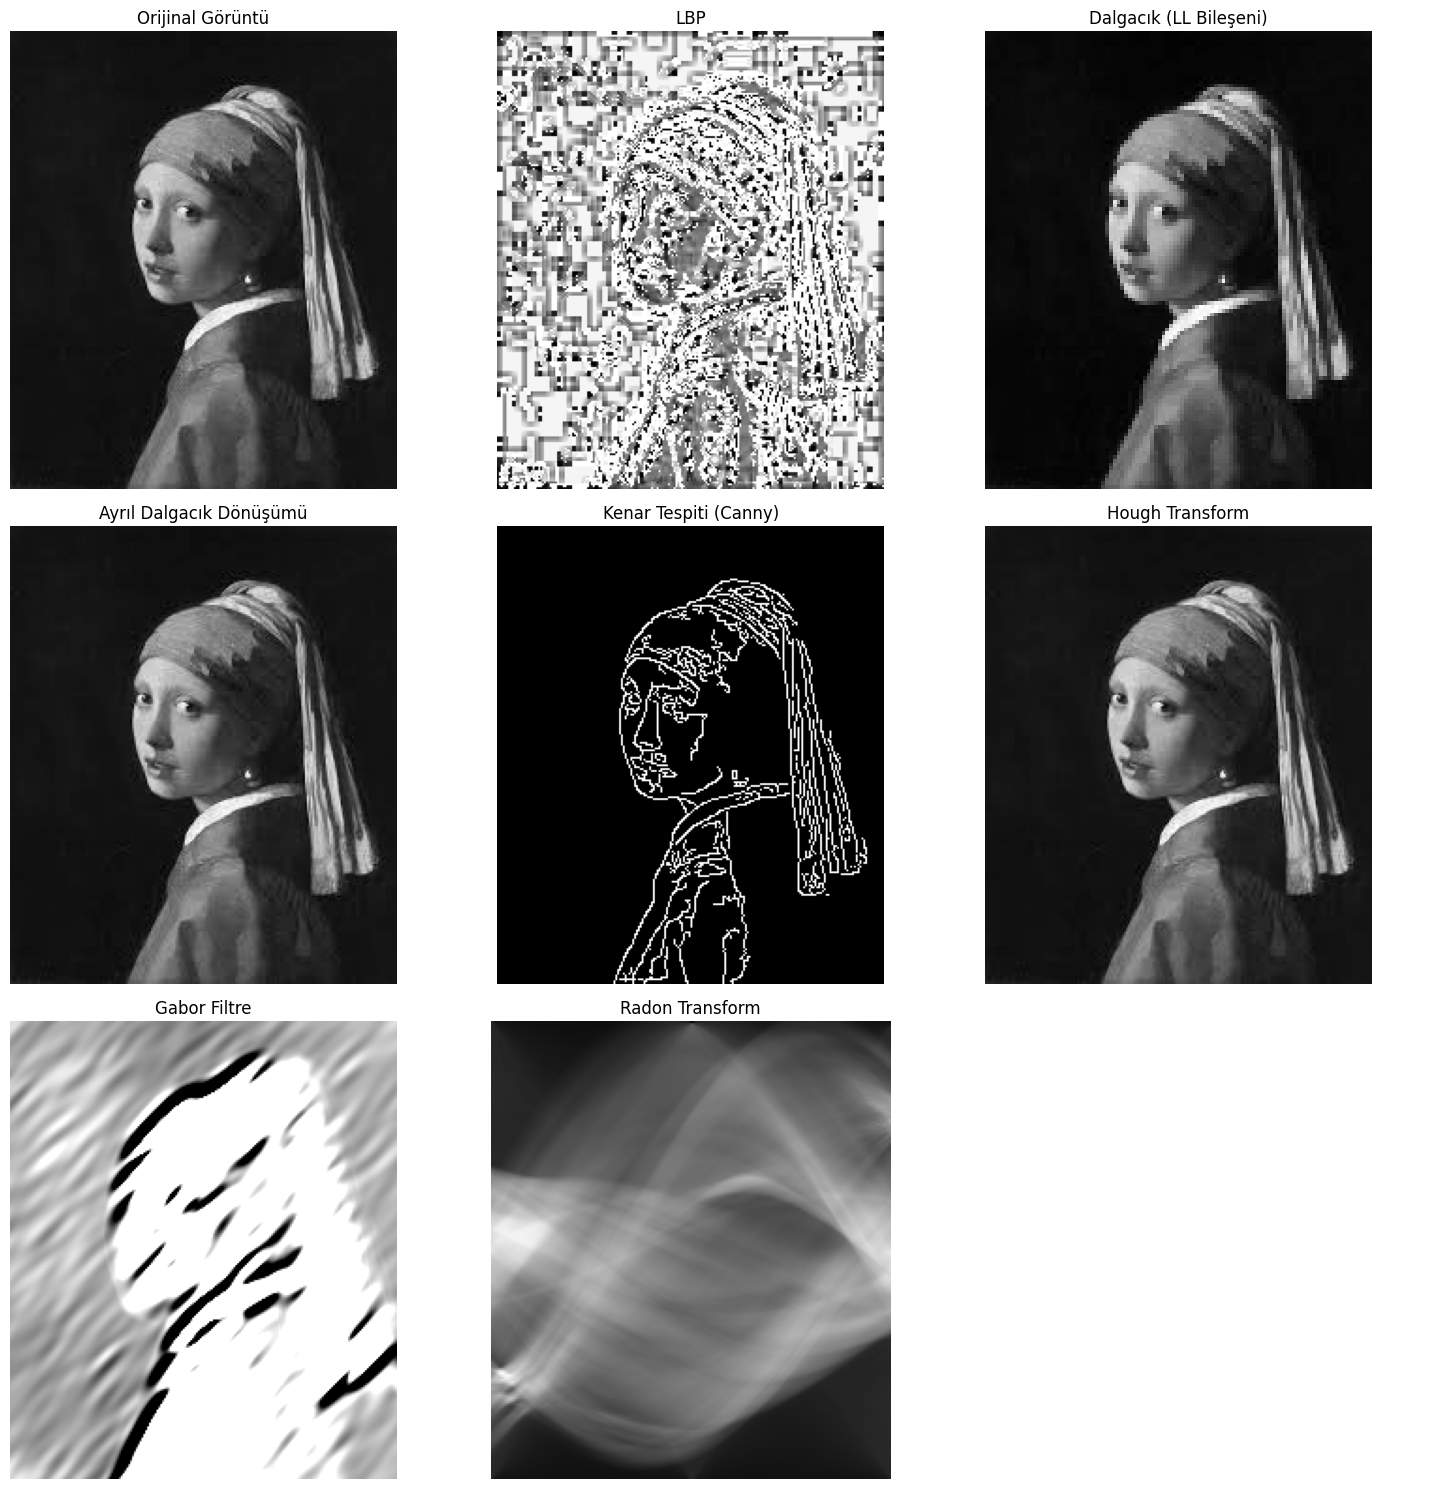

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from skimage.transform import radon
import pywt

# Giriş resmi yükleme
image_path = "inci_kupeli_kiz.jpg"  # Buraya işlem yapmak istediğiniz fotoğrafın yolunu yazın
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# LBP (Local Binary Pattern)
radius = 3
n_points = 8 * radius
lbp = local_binary_pattern(image, n_points, radius, method="uniform")

# Dalgacık dönüşümü (Wavelet Transform)
coeffs = pywt.dwt2(image, 'haar')
LL, (LH, HL, HH) = coeffs

# Ayrıl dalgacık dönüşümü (Discrete Wavelet Transform, DWT)
dwt_image = pywt.idwt2(coeffs, 'haar')

# Hough Transform
edges = cv2.Canny(image, 50, 150)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)
hough_image = np.copy(image)
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(hough_image, (x1, y1), (x2, y2), (255, 0, 0), 1)

# Gabor Filtreleri
def gabor_filter(image, ksize, sigma, theta, lambd, gamma, psi):
    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_32F)
    return cv2.filter2D(image, cv2.CV_8UC3, kernel)
gabor_image = gabor_filter(image, 31, 4.0, np.pi / 4, 10.0, 0.5, 0)

# Radon Transform
sinogram = radon(image, circle=True)

# Sonuçları Görselleştirme
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()

axes[0].imshow(image, cmap='gray')
axes[0].set_title("Orijinal Görüntü")

axes[1].imshow(lbp, cmap='gray')
axes[1].set_title("LBP")

axes[2].imshow(LL, cmap='gray')
axes[2].set_title("Dalgacık (LL Bileşeni)")

axes[3].imshow(dwt_image, cmap='gray')
axes[3].set_title("Ayrıl Dalgacık Dönüşümü")

axes[4].imshow(edges, cmap='gray')
axes[4].set_title("Kenar Tespiti (Canny)")

axes[5].imshow(hough_image, cmap='gray')
axes[5].set_title("Hough Transform")

axes[6].imshow(gabor_image, cmap='gray')
axes[6].set_title("Gabor Filtre")

axes[7].imshow(sinogram, cmap='gray')
axes[7].set_title("Radon Transform")

for ax in axes:
    ax.axis("off")
plt.tight_layout()
plt.show()
